In [1]:
import numpy as np
from brian2 import *


In [22]:
## Neurons
taum = 10*ms
Ee = 0*mV
vt = -54*mV
vr = -60*mV
El = -74*mV
taue = 5*ms

## Stimuli section

input_indices = array([0, 0 , 0, 0, 0])
input_times = array([ 5,  15,25,35,45])*ms
input = SpikeGeneratorGroup(1, input_indices, input_times)

In [23]:
G= NeuronGroup(1, '''dv/dt = (ge * (Ee-vr) + El - v) / taum : volt
                            dge/dt = -ge / taue : 1''',
                      threshold='v>vt', reset='v = vr',
                      method='exact')
G.v = vr
neurons_monitor = SpikeMonitor(G)

In [25]:
#definition of synapes
w = 0.1 * mV
S = Synapses(input, G,  model='''w: volt''',
                   on_pre='v += w')

M = StateMonitor(G, 'v', record=True)


In [26]:
#definition of q-values
#Q(s,a) : s = 1 and a=3
q_val = np.zeros((1,3))
#definition of actions
action = [0,1,2]
# 0 : p=0
# 1 : p=1
# 2 :we have delay on synape
# definition of reward

#define reward action
reward_action = {
    0 :-1,
    1 :1,
    2: 0.5
}

In [6]:
q_val

array([[0., 0., 0.]])

In [27]:
#define an epsilon greedy algorithm that will choose which action to take next (i.e., where to move next)
def get_next_action(q_val, epsilon):
  #if a randomly chosen value between 0 and 1 is less than epsilon, 
  #then choose the most promising value from the Q-table for this state.
    if np.random.random() < epsilon:
        return np.argmax(q_val)
    else: #choose a random action
        return np.random.randint(3)

In [28]:
#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn
#run through 100 training episodes
#store()
for episode in range(50):
    
    action_index = get_next_action(q_val,epsilon)
    
    if action_index == 0 :
        S.connect(p = 0)
        immediate_reward = reward_action[0]
        
    if action_index == 1:
        S.connect(p=1)
        immediate_reward = reward_action[1]
    if action_index ==2:
        S.connect()
        S.delay(G.i*2ms)
        immediate_reward = reward_action[2]
        
        run(50*ms)
        
    q_val[0,action_index] = q_val[0,action_index] + learning_rate*(immediate_reward+discount_factor*(max(q_val[0]))-q_val[0,action_index])
    print(q_val,action_index,immediate_reward)
        restore()
        
    

[[-0.9  0.   0. ]] 0 -1
[[-0.9  0.9  0. ]] 1 1
[[-0.9    1.719  0.   ]] 1 1
[[-0.9      2.46429  0.     ]] 1 1
[[-0.9        3.1425039  0.       ]] 1 1
[[-0.9         3.75967855  0.        ]] 1 1
[[-0.9         4.32130748  0.        ]] 1 1
[[-0.9         4.83238981  0.        ]] 1 1
[[-0.9         5.29747472  0.        ]] 1 1
[[-0.9       5.720702  0.      ]] 1 1
[[3.64376862 5.720702   0.        ]] 0 -1
[[3.64376862 6.10583882 0.        ]] 1 1
[[3.64376862 6.45631333 0.        ]] 1 1
[[3.64376862 6.77524513 0.        ]] 1 1
[[3.64376862 7.06547306 0.        ]] 1 1
[[3.64376862 7.32958049 0.        ]] 1 1
[[3.64376862 7.56991824 0.        ]] 1 1
[[3.64376862 7.7886256  0.        ]] 1 1
[[3.64376862 7.9876493  0.        ]] 1 1
[[3.64376862 8.16876086 0.        ]] 1 1
[[6.08107316 8.16876086 0.        ]] 0 -1
[[6.08107316 8.33357238 0.        ]] 1 1
[[6.08107316 8.48355087 0.        ]] 1 1
[[6.08107316 8.62003129 0.        ]] 1 1
[[6.08107316 8.62003129 7.43222535]] 2 0.5
[[6.08107316 8.

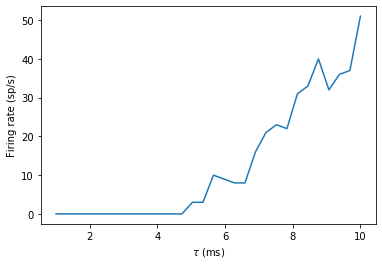

WARNING    "tau" is an internal variable of group "neurongroup_5", but also exists in the run namespace with the value 10. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


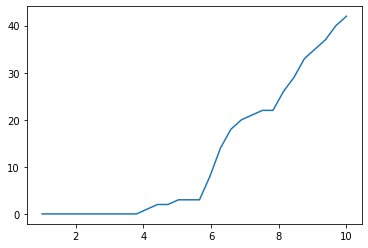

In [37]:
#define training parameters
epsilon = 0.95 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn
#run through 100 training episodes
#store()
for episode in range(100):
    
    action_index = get_next_action(q_val,epsilon)
    
    if action_index == 0 :
        S.connect(p = 0)
        immediate_reward = reward_action[0]
        
    if action_index == 1:
        S.connect(p=1)
        immediate_reward = reward_action[1]
    if action_index ==2:
        S.connect()
        S.delay(G.i*2ms)
        immediate_reward = reward_action[2]
        
        run(50*ms)
        
    q_val[0,action_index] = q_val[0,action_index] + learning_rate*(immediate_reward+discount_factor*(max(q_val[0]))-q_val[0,action_index])
    #print(q_val,action_index,immediate_reward)
        
        for tau in tau_range:
        restore()
        output_rates.append(M.v[0]/second)
        plot(tau_range/ms, output_rates)



In [3]:
# G.v = vr
# Q1 = 0
Q2 = 0
Q = [0, 0]
out = [1, 0]
b = 1*mV
gamma = 0.9
alpha = 0.6
a = 0
r = 1

Si = Synapses(Gi, G, model='w : volt', on_pre='''w += b
                                V += w''')

# S = Synapses(G, G, model='w : volt', on_pre=''' ''')
smi = SpikeMonitor(Gi)
sms = StateMonitor(Si, ['w'], record=[0])

0 0
[-0.6, 4.8] 1 1


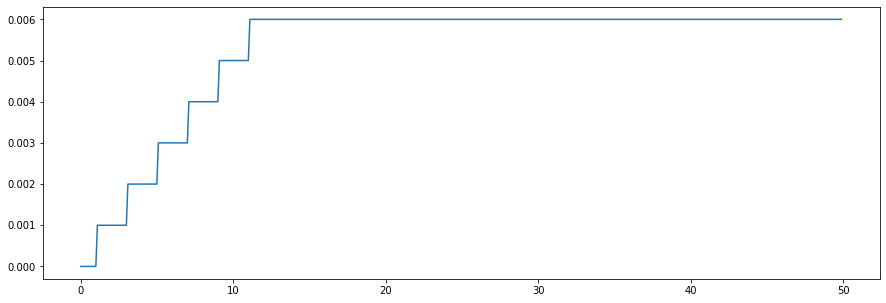

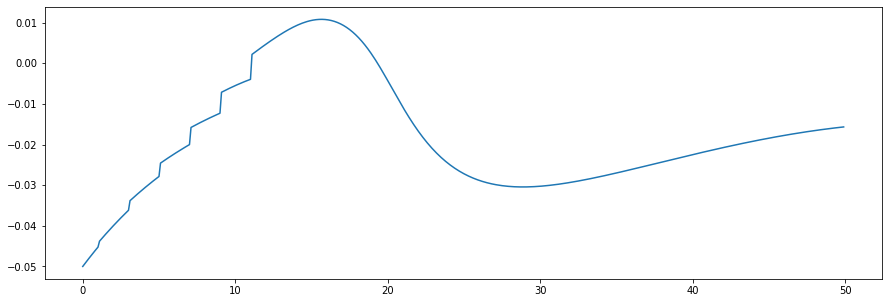

30 10
[-0.6, 5.3999999999999995] 1 1


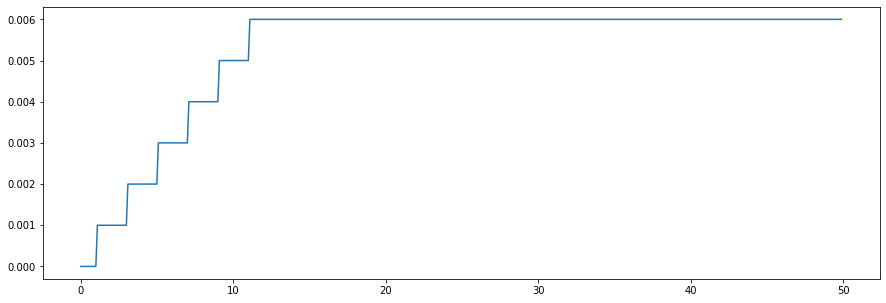

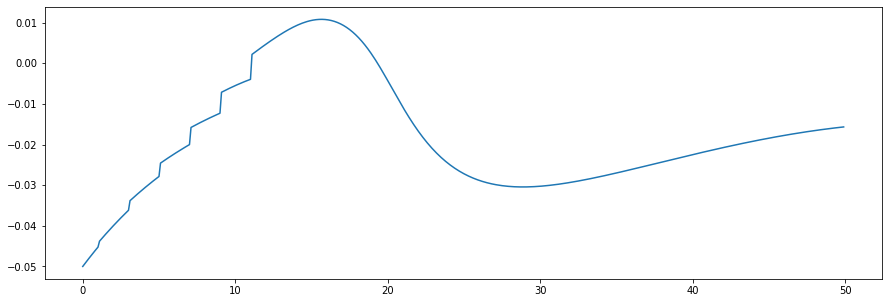

60 20
[-0.6, 5.999999999999999] 1 1


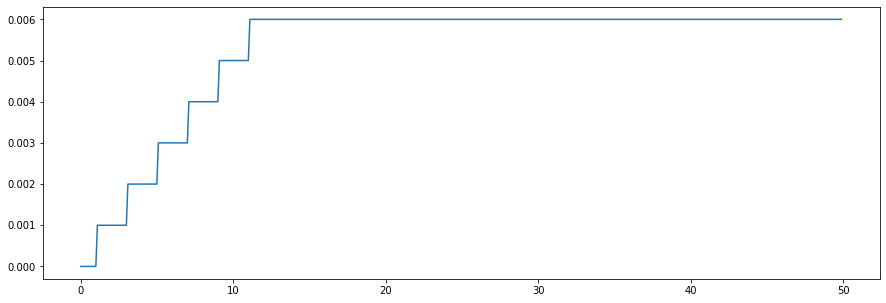

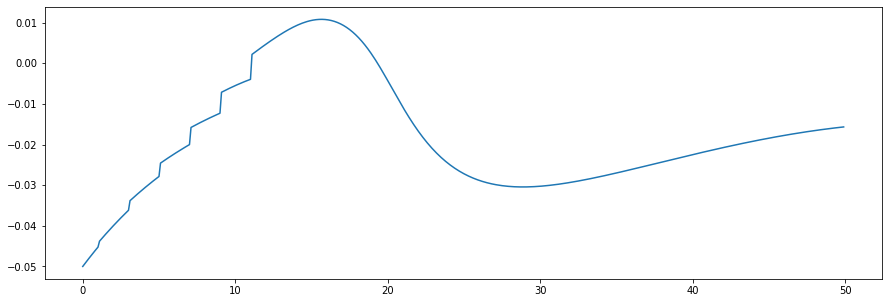

90 30
[-0.6, 6.599999999999999] 1 1


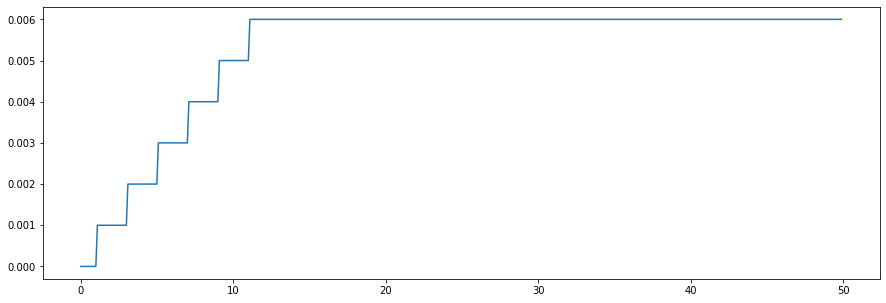

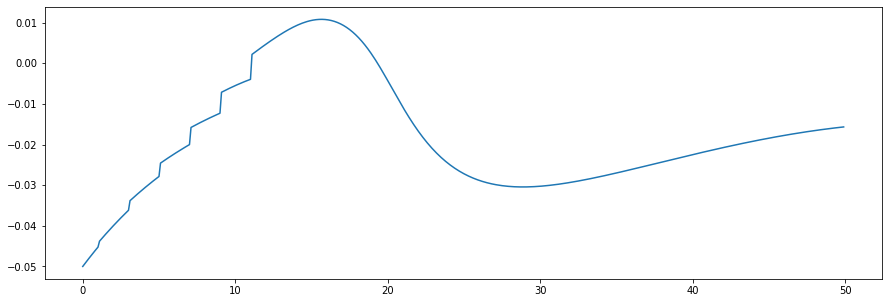

120 40
[-0.6, 7.199999999999998] 1 1


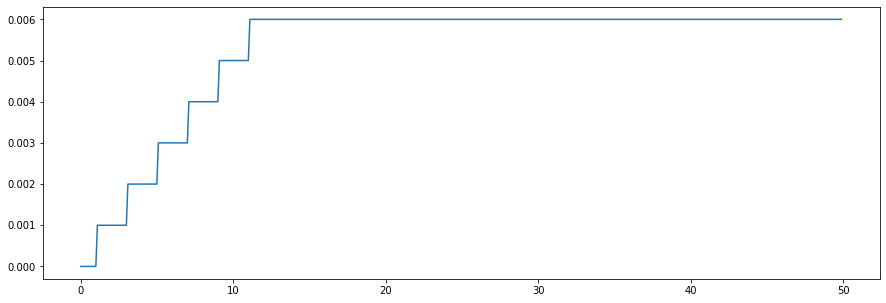

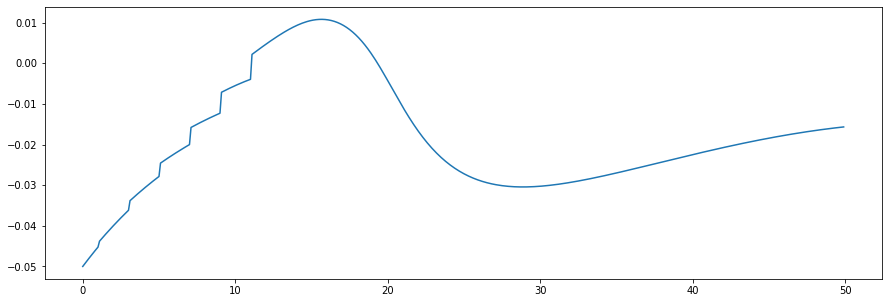

150 50
[-0.6, 7.799999999999998] 1 1


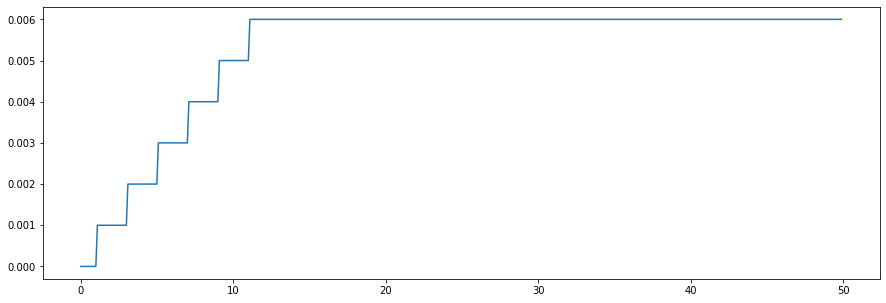

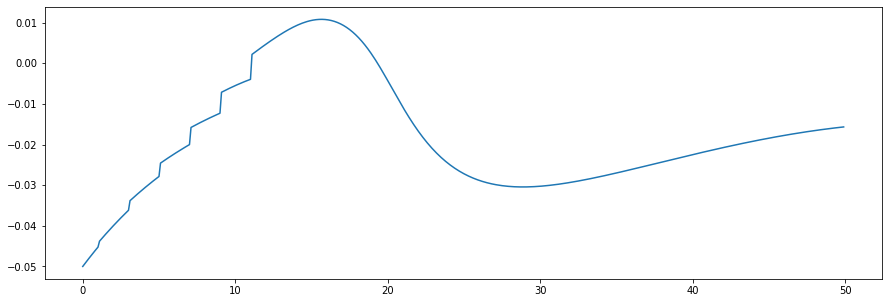

180 60
[-0.6, 8.399999999999999] 1 1


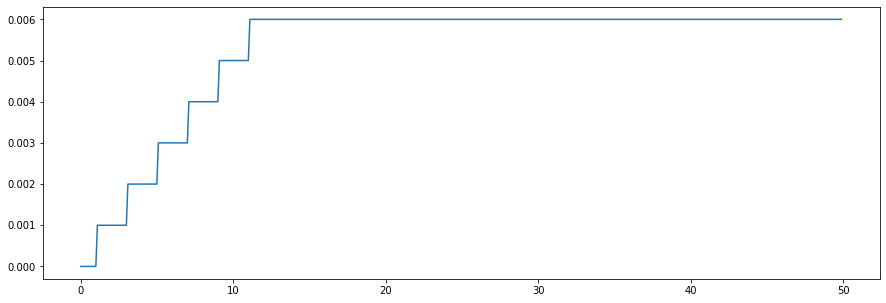

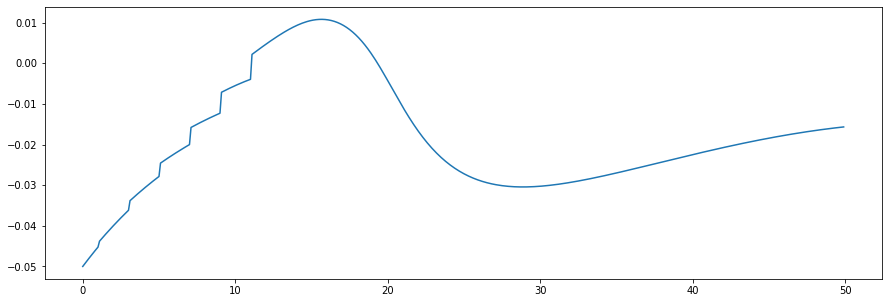

210 70
[-0.6, 8.999999999999998] 1 1


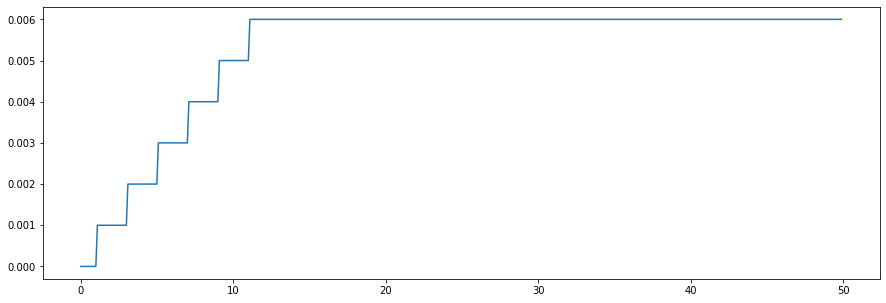

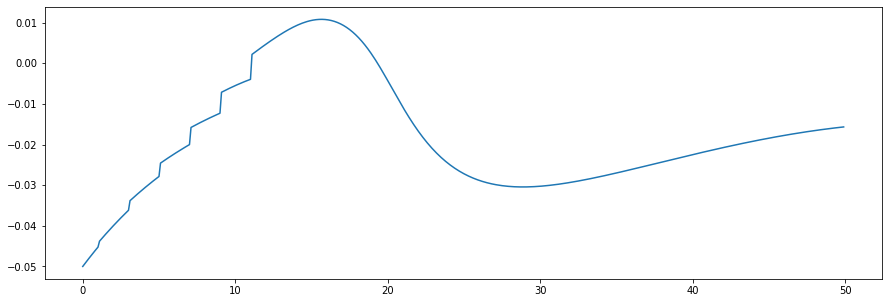

240 80
[-0.6, 9.599999999999998] 1 1


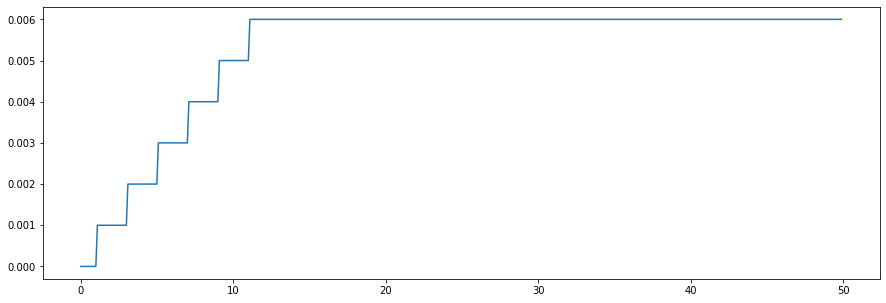

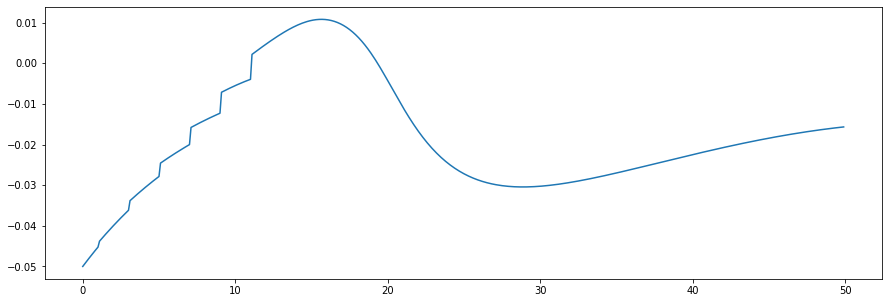

270 90
[-0.6, 10.199999999999998] 1 1


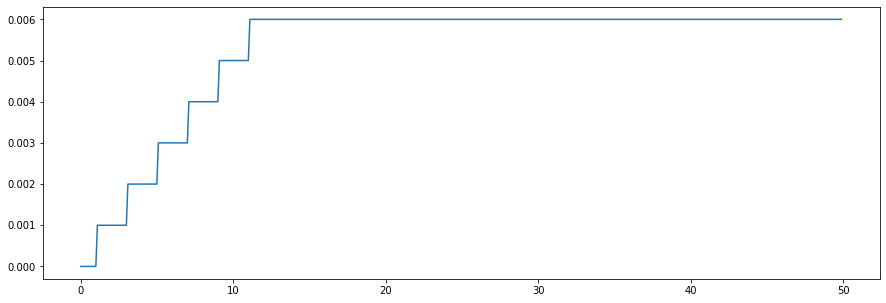

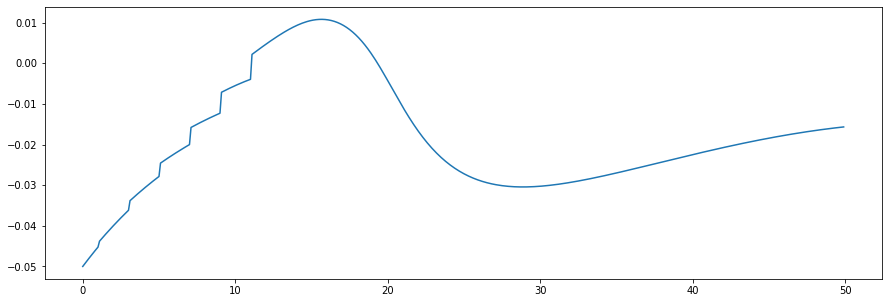

In [5]:

store()
#define training parameters
epsilon = 0.95 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn
#run through 100 training episodes
#store()
for episode in range(100):
    
    action_index = get_next_action(q_val,epsilon)
    
    if action_index == 0 :
        S.connect(p = 0)
        immediate_reward = reward_action[0]
        
    if action_index == 1:
        S.connect(p=1)
        immediate_reward = reward_action[1]
        
        run(50*ms)
        
    q_val[0,action_index] = q_val[0,action_index] + learning_rate*(immediate_reward+discount_factor*(max(q_val[0]))-q_val[0,action_index])
    #print(q_val,action_index,immediate_reward)
        

    print(30*i , 10*i)
    print(Q, r, a)
    for i in sms:
        figure(figsize=(15,5))
        plot(i.t/ms, i.w)
        show()
    for i in sm:
        figure(figsize=(15,5))
        plot(i.t/ms, i.V)
        show()
    restore()
